In [16]:
import gym
import highway_env
import matplotlib.pyplot as plt 
from stable_baselines3 import DQN, PPO, A2C

env = gym.make('ma-highway-v0')


c:\Users\IoTLab\anaconda3\envs\HighwayEnv\lib\site-packages\gym\utils\passive_env_checker.py:32: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (5, 4)
  "A Box observation space has an unconventional shape (neither an image, nor a 1D vector). "
c:\Users\IoTLab\anaconda3\envs\HighwayEnv\lib\site-packages\gym\core.py:330: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."
c:\Users\IoTLab\anaconda3\envs\HighwayEnv\lib\site-packages\gym\wra

In [17]:
from matplotlib import pyplot as pyplot
%matplotlib inline

c:\Users\IoTLab\anaconda3\envs\HighwayEnv\lib\site-packages\gym\core.py:52: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  "The argument mode in render method is deprecated; "
c:\Users\IoTLab\anaconda3\envs\HighwayEnv\lib\site-packages\gym\utils\passive_env_checker.py:298: UserWarning: WARN: No render fps was declared in the environment (env.metadata['render_fps'] is None or not defined), rendering may occur at inconsistent fps.
  "No render fps was declared in the environment (env.metadata['render_fps'] is None or not defined), rendering may occur at inconsistent fps."


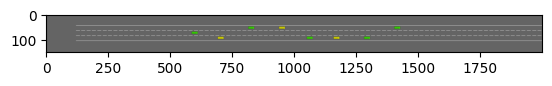

In [18]:
env.configure(  {
                "speed_limit": 20,
                "vehicles_density": 1,
                "ego_spacing": 1.25,
                "road_length":10000, 
                 "screen_width": 2000, 
                "simulation_frequency":15, 
                "duration":40,
                "normalize_reward": True,
                "DLC_config": {
                    "count": 3,
                    "reward_speed_range": [23, 31],
                    "weights": [2,10,1,1],
                        },
                "MLC_config": {
                    "count":5 ,
                    "reward_speed_range": [19, 23],
                    "weights": [2,10,1,1]
                        }, 
                })
env.reset()
plt.imshow(env.render(mode="rgb_array"))
plt.show()

In [57]:
# Visualization utils
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [31]:
%tensorboard --logdir "highway_a2c/"

Reusing TensorBoard on port 6006 (pid 42928), started 4 days, 23:43:17 ago. (Use '!kill 42928' to kill it.)

In [19]:
import os 

#MODEL TRAINING
A2C_path = os.path.join('Training', 'Saved Models', 'A2C_model')

model = A2C('MultiInputPolicy', env,
            policy_kwargs=dict(net_arch=[256, 256]),
            learning_rate=5e-4,
            gamma=0.8,
            verbose=1,
            tensorboard_log="highway_a2c/2",
            normalize_advantage=True)

model.learn(total_timesteps=int(1e4))

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to highway_a2c/2\A2C_8
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 6.67     |
|    ep_rew_mean        | 4.79     |
| time/                 |          |
|    fps                | 6        |
|    iterations         | 100      |
|    time_elapsed       | 79       |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -11.5    |
|    explained_variance | 0.562    |
|    learning_rate      | 0.0005   |
|    n_updates          | 99       |
|    policy_loss        | -0.16    |
|    value_loss         | 0.202    |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 6.86     |
|    ep_rew_mean        | 4.96     |
| time/                 |          |
|    fps                | 6        |
|    iterations        

KeyboardInterrupt: 

In [13]:
#MODEL SAVING
model.save(A2C_path)

In [15]:
from tqdm.notebook import trange

###MODEL TESTING###
model = PPO.load('Training/Saved Models/A2C_model', env=env)
for episode in trange(10, desc="Test episodes"):
    env.configure({"simulation_frequency":15,})
    obs, done = env.reset(), False
    while not done:
        action, _ = model.predict(obs, deterministic=True)
        obs, reward, done, info = env.step(action)
        print(info)
        env.render('human')
env.close()

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


c:\Users\IoTLab\anaconda3\envs\HighwayEnv\lib\site-packages\gym\core.py:330: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."


Test episodes:   0%|          | 0/10 [00:00<?, ?it/s]

{'vehicles_speed': [20.895258694252718, 22.91393073683578, 20.701839446534482, 22.831219142396183, 20.78806332242364, 22.923698788446963, 20.902043478681854, 24.878706995697556, 18.82198285397846, 20.67448266481244], 'crashed': False, 'action': array([1, 4, 0, 4, 1, 4, 2, 0, 4, 2], dtype=int64), 'rewards': [{'proactive_mlc_reward': [-0.011265777523922563, 2.5], 'collision_penalty': [0, 10], 'lane change penalty': [0, 1], 'high_speed_reward': [0.4738146735631794, 1]}, {'target_speed_reward': [0, 2.5], 'collision_penalty': [0, 10], 'lane change penalty': [0, 1], 'high_speed_reward': [0.0, 1]}, {'proactive_mlc_reward': [-0.01548039978435695, 2.5], 'collision_penalty': [0, 10], 'lane change penalty': [-1, 1], 'high_speed_reward': [0.4254598616336205, 1]}, {'target_speed_reward': [0, 2.5], 'collision_penalty': [0, 10], 'lane change penalty': [0, 1], 'high_speed_reward': [0.0, 1]}, {'proactive_mlc_reward': [0.979478257928188, 2.5], 'collision_penalty': [0, 10], 'lane change penalty': [0, 1],

c:\Users\IoTLab\anaconda3\envs\HighwayEnv\lib\site-packages\gym\core.py:52: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  "The argument mode in render method is deprecated; "


{'vehicles_speed': [21.81121270854227, 22.156180010188436, 21.778159634756985, 22.142045571831535, 21.792894280690305, 22.157849255284006, 21.812372148375683, 26.637495983369973, 17.311355433435477, 21.773484682623454], 'crashed': False, 'action': array([1, 4, 0, 4, 1, 4, 2, 0, 4, 2], dtype=int64), 'rewards': [{'proactive_mlc_reward': [-0.013410820283065195, 2.5], 'collision_penalty': [0, 10], 'lane change penalty': [0, 1], 'high_speed_reward': [0.7028031771355678, 1]}, {'target_speed_reward': [1, 2.5], 'collision_penalty': [0, 10], 'lane change penalty': [0, 1], 'high_speed_reward': [0.0, 1]}, {'proactive_mlc_reward': [-0.0176158205730636, 2.5], 'collision_penalty': [0, 10], 'lane change penalty': [-1, 1], 'high_speed_reward': [0.6945399086892463, 1]}, {'target_speed_reward': [1, 2.5], 'collision_penalty': [0, 10], 'lane change penalty': [0, 1], 'high_speed_reward': [0.0, 1]}, {'proactive_mlc_reward': [0.977338547785684, 2.5], 'collision_penalty': [0, 10], 'lane change penalty': [0, 1